In [1]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.11.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.5
bleach                    6.2.0
certifi                   2025.8.3
cffi                      2.0.0
charset-normalizer        3.4.3
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fastjsonschema            2.21.2
fonttools                 4.60.0
fqdn                      1.5.1
h11                       0.16.0
httpcore                  1.0.9
httpx                     0.28.1
idna                      3.10
imbalanced-lear

In [2]:
pip install numpy matplotlib seaborn torch torchvision scikit-learn

  Using cached torch-2.10.0-cp313-cp313-win_amd64.whl.metadata (31 kB)
  Using cached torchvision-0.25.0-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached filelock-3.20.3-py3-none-any.whl.metadata (2.1 kB)
  Using cached fsspec-2026.1.0-py3-none-any.whl.metadata (10 kB)
Using cached torch-2.10.0-cp313-cp313-win_amd64.whl (113.8 MB)
Using cached torchvision-0.25.0-cp313-cp313-win_amd64.whl (4.3 MB)
Using cached fsspec-2026.1.0-py3-none-any.whl (201 kB)
Using cached filelock-3.20.3-py3-none-any.whl (16 kB)

   ---------------------------------------- 0/4 [fsspec]
   ---------------------------------------- 0/4 [fsspec]
   ---------------------------------------- 0/4 [fsspec]
   ---------------------------------------- 0/4 [fsspec]
   ---------------------------------------- 0/4 [fsspec]
   ---------------------------------------- 0/4 [fsspec]
   ---------------------------------------- 0/4 [fsspec]
   ---------------------------------------- 0/4 [fsspec]
   ---------------------


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Using device: cpu
Train: (7007, 28, 28, 3) (7007, 1)
Val  : (1003, 28, 28, 3) (1003, 1)
Number of classes: 7


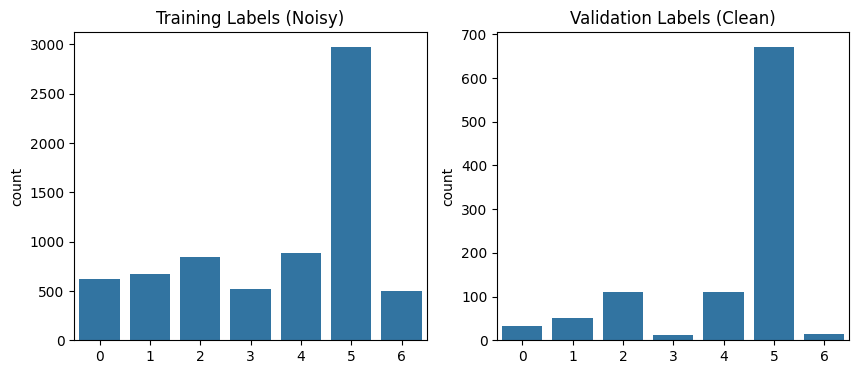

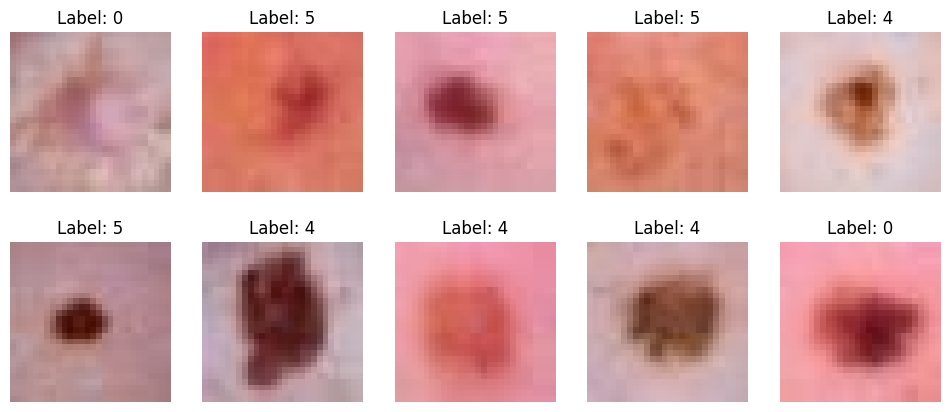

Epoch [1/20] | Loss: 1.7521 | Val Acc: 0.6690
Epoch [2/20] | Loss: 1.7375 | Val Acc: 0.6690
Epoch [3/20] | Loss: 1.7235 | Val Acc: 0.6690
Epoch [4/20] | Loss: 1.7160 | Val Acc: 0.6690
Epoch [5/20] | Loss: 1.7145 | Val Acc: 0.6690
Epoch [6/20] | Loss: 1.7137 | Val Acc: 0.6700
Epoch [7/20] | Loss: 1.7112 | Val Acc: 0.6690
Epoch [8/20] | Loss: 1.7035 | Val Acc: 0.6730
Epoch [9/20] | Loss: 1.7026 | Val Acc: 0.6949
Epoch [10/20] | Loss: 1.7018 | Val Acc: 0.6730
Epoch [11/20] | Loss: 1.6982 | Val Acc: 0.6720
Epoch [12/20] | Loss: 1.6958 | Val Acc: 0.6949
Epoch [13/20] | Loss: 1.6931 | Val Acc: 0.6979
Epoch [14/20] | Loss: 1.6909 | Val Acc: 0.7119
Epoch [15/20] | Loss: 1.6906 | Val Acc: 0.6889
Epoch [16/20] | Loss: 1.6847 | Val Acc: 0.6889
Epoch [17/20] | Loss: 1.6798 | Val Acc: 0.6909
Epoch [18/20] | Loss: 1.6790 | Val Acc: 0.6810
Epoch [19/20] | Loss: 1.6734 | Val Acc: 0.6929
Epoch [20/20] | Loss: 1.6714 | Val Acc: 0.6859
Best Validation Accuracy: 0.711864406779661


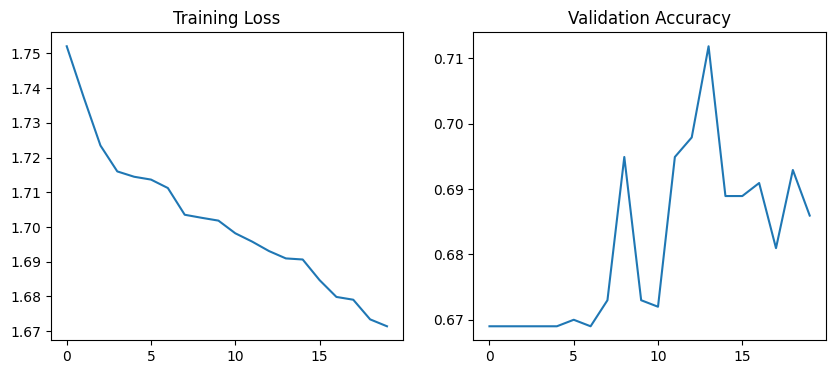

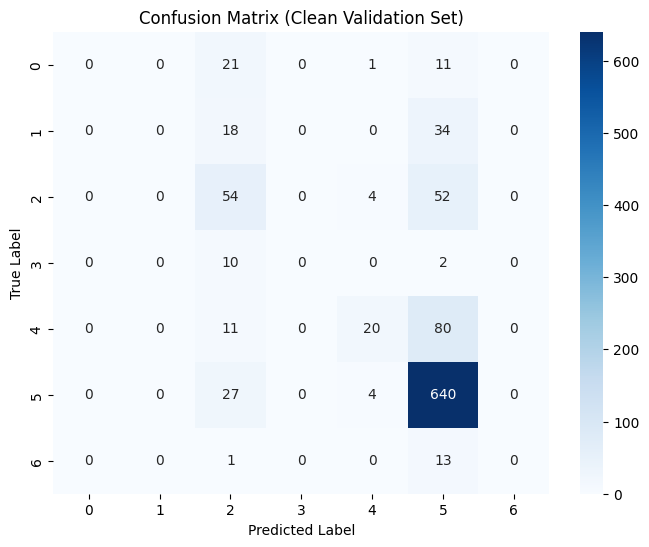

Classification Report:

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        33
           1     0.0000    0.0000    0.0000        52
           2     0.3803    0.4909    0.4286       110
           3     0.0000    0.0000    0.0000        12
           4     0.6897    0.1802    0.2857       111
           5     0.7692    0.9538    0.8516       671
           6     0.0000    0.0000    0.0000        14

    accuracy                         0.7119      1003
   macro avg     0.2627    0.2321    0.2237      1003
weighted avg     0.6326    0.7119    0.6484      1003

Total misclassified samples: 289


D:\jbooks\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\jbooks\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\jbooks\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


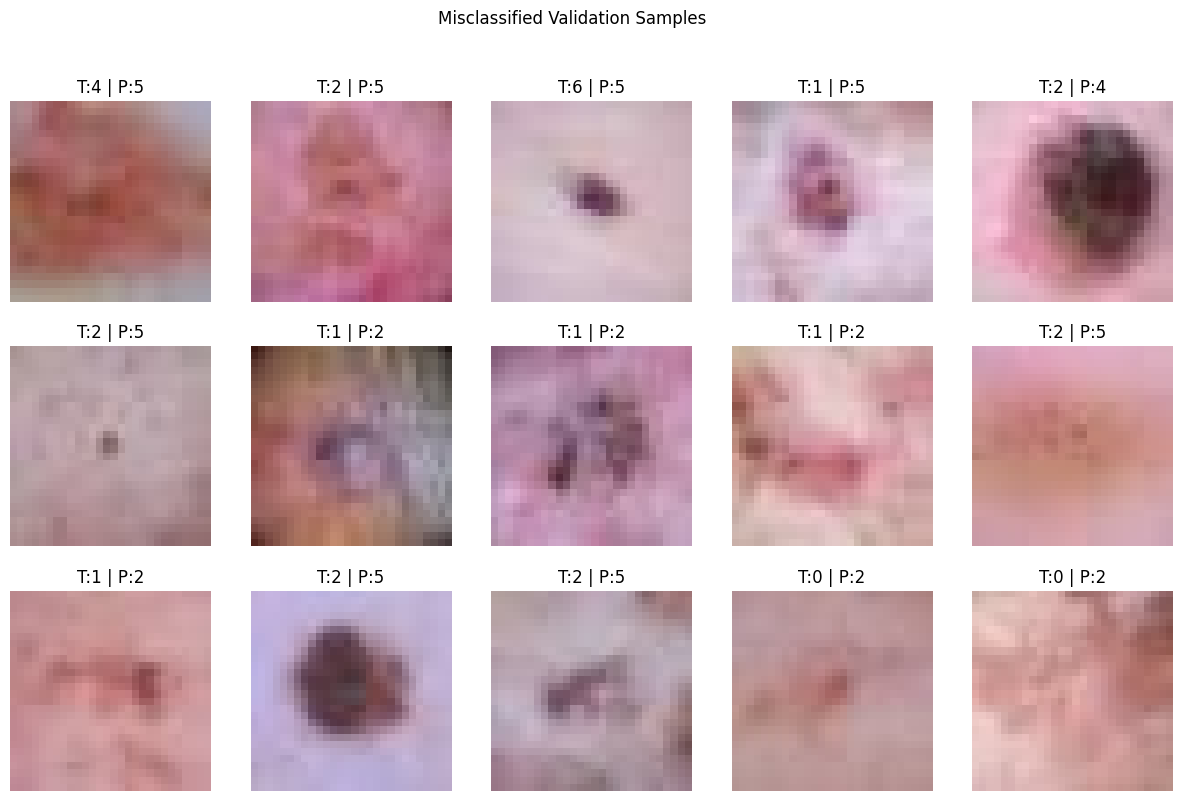

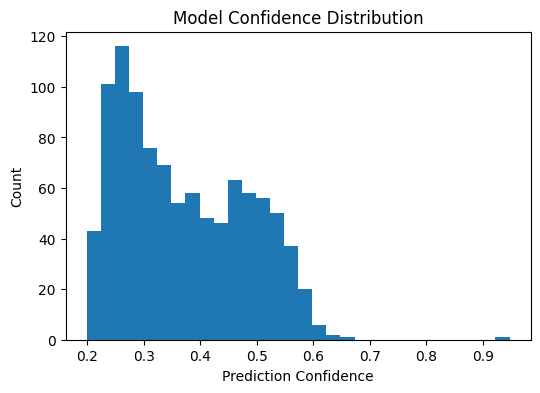

Live Validation Accuracy: 0.711864406779661


In [3]:
# ======================================================
# 1. Imports & Setup
# ======================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import confusion_matrix, classification_report

# Reproducibility
torch.manual_seed(42)
np.random.seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ======================================================
# 2. Load Dataset
# ======================================================
data = np.load("candidate_dataset.npz")

X_train = data["x_train"]
y_train = data["y_train"]

X_val = data["x_val"]
y_val = data["y_val"]

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)

NUM_CLASSES = len(np.unique(y_val))
print("Number of classes:", NUM_CLASSES)

# ======================================================
# 3. Exploratory Data Analysis (EDA)
# ======================================================
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x=y_train.squeeze())
plt.title("Training Labels (Noisy)")

plt.subplot(1,2,2)
sns.countplot(x=y_val.squeeze())
plt.title("Validation Labels (Clean)")
plt.show()

# Sample images
fig, axes = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(f"Label: {y_train[i][0] if y_train.ndim > 1 else y_train[i]}")
    ax.axis("off")
plt.show()

# ======================================================
# 4. Dataset & DataLoader
# ======================================================
class DermDataset(Dataset):
    def __init__(self, images, labels=None):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx] / 255.0              # (28, 28, 3)
        img = torch.tensor(img, dtype=torch.float32)
        img = img.permute(2, 0, 1)                  # (3, 28, 28)

        if self.labels is not None:
            label = self.labels[idx]
            if isinstance(label, np.ndarray):
                label = label.squeeze()
            label = torch.tensor(label, dtype=torch.long)
            return img, label

        return img

train_ds = DermDataset(X_train, y_train)
val_ds   = DermDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=64, shuffle=False)

# ======================================================
# 5. CNN Model
# ======================================================
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

model = SimpleCNN(NUM_CLASSES).to(device)

# ======================================================
# 6. Loss & Optimizer (Noise Robust)
# ======================================================
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ======================================================
# 7. Training Loop
# ======================================================
EPOCHS = 20
train_losses = []
val_accuracies = []
best_val_acc = 0.0

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        preds = model(x)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            preds = model(x)
            _, predicted = preds.max(1)
            correct += (predicted == y).sum().item()
            total += y.size(0)

    val_acc = correct / total
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")

    print(f"Epoch [{epoch+1}/{EPOCHS}] | "
          f"Loss: {avg_loss:.4f} | Val Acc: {val_acc:.4f}")

print("Best Validation Accuracy:", best_val_acc)

# ======================================================
# 8. Training Curves
# ======================================================
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses)
plt.title("Training Loss")

plt.subplot(1,2,2)
plt.plot(val_accuracies)
plt.title("Validation Accuracy")

plt.show()

# ======================================================
# 9. Load Best Model
# ======================================================
best_model = SimpleCNN(NUM_CLASSES).to(device)
best_model.load_state_dict(torch.load("best_model.pth"))
best_model.eval()

# ======================================================
# 10. Confusion Matrix & Classification Report
# ======================================================
all_preds, all_labels = [], []

with torch.no_grad():
    for x, y in val_loader:
        x, y = x.to(device), y.to(device)
        outputs = best_model(x)
        _, preds = outputs.max(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Clean Validation Set)")
plt.show()

print("Classification Report:\n")
print(classification_report(all_labels, all_preds, digits=4))

# ======================================================
# 11. Misclassification Analysis
# ======================================================
mis_idx = np.where(all_preds != all_labels)[0]
print("Total misclassified samples:", len(mis_idx))

fig, axes = plt.subplots(3, 5, figsize=(15,9))
for i, ax in enumerate(axes.flatten()):
    idx = mis_idx[i]
    ax.imshow(X_val[idx], cmap="gray")
    ax.set_title(f"T:{all_labels[idx]} | P:{all_preds[idx]}")
    ax.axis("off")

plt.suptitle("Misclassified Validation Samples")
plt.show()

# ======================================================
# 12. Confidence Analysis
# ======================================================
confidences = []

with torch.no_grad():
    for x, _ in val_loader:
        x = x.to(device)
        probs = F.softmax(best_model(x), dim=1)
        conf, _ = probs.max(dim=1)
        confidences.extend(conf.cpu().numpy())

plt.figure(figsize=(6,4))
plt.hist(confidences, bins=30)
plt.xlabel("Prediction Confidence")
plt.ylabel("Count")
plt.title("Model Confidence Distribution")
plt.show()

# ======================================================
# 13. LIVE INFERENCE FUNCTION
# ======================================================
def run_live_inference(model_path, test_images, test_labels=None):
    model = SimpleCNN(NUM_CLASSES).to(device)
    model.load_state_dict(torch.load(model_path))
    model.eval()

    dataset = DermDataset(test_images, test_labels)
    loader = DataLoader(dataset, batch_size=64, shuffle=False)

    correct, total = 0, 0
    predictions = []

    with torch.no_grad():
        for batch in loader:
            if test_labels is not None:
                x, y = batch
                y = y.to(device)
            else:
                x = batch

            x = x.to(device)
            outputs = model(x)
            _, preds = outputs.max(1)
            predictions.extend(preds.cpu().numpy())

            if test_labels is not None:
                correct += (preds == y).sum().item()
                total += y.size(0)

    if test_labels is not None:
        return correct / total

    return np.array(predictions)

# ======================================================
# 14. Example Live Validation Run
# ======================================================
val_accuracy = run_live_inference("best_model.pth", X_val, y_val)
print("Live Validation Accuracy:", val_accuracy)